In [26]:
# Math 
from math import sqrt
from scipy import stats
import statistics
import os

# General
import numpy as np
import pandas as pd

# Sklearn Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Graph
from tabulate import tabulate

# Custom Module's
from acquire import get_telco_data, get_data_dictionary, get_target
from prepare import prep_telco_data, clean_telco
import explore


import warnings
warnings.filterwarnings("ignore")

<p style="font-family:courier; font-size:200%; text-align:center"> <b>Project Planning<b> </p>

<p style="font-family:courier; font-size:150%;">
<b>Project and Goals</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The project and goal is to find and document drivers for customer churn at Telco and to construct a machine learning classification model that accurately predicts customer churn.<br><br><b>Starting Hypotheses</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Churned customers average total charges is greather than average total charges for not churned customers. The big idea here is that customers are leaving because they are paying too much for services.</p>

<p style="font-family:courier; font-size:150%;">
<b>The Plan</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Setup my environment, create a new repository, update the .gitignore, create a README.md with the data dictionary, project and business goals, and come up with initial hypotheses.<br><br>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Acquire the data, create a python function and SQL script to select all the features and observations from the codeup database.<br><br>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Clean the data, drop any useless features, remove duplicate observations, double check data-types, find any null values, decide what do with null values, and encode the features.<br><br>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Split the Data, split into three data sets named train, validate, and test.<br><br>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Explore the data, look through the graphs and evaluate each feature to see if they play a part in churn.  Exploration will also include two hypotheses, setting of alpha, statistical tests, rejecting or failing to reject the null hypothesis, and documentation of the findings and takeaways.<br><br>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Create Models, create three machine learning models plus a baseline model.  Will be using a DecisionTreeClassifier, RandomForestClassifier, and KNeighborsClassifier.  Evaluate models on train and validate datasets.  Pick the model with highest validate accuracy to run on my final test data.<br><br>
<b></b><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Create csv, this will include a file with the measurement id, the probability of the target values, and the model's prediction for each observation in my test dataset.<br><br>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Wrap it up, document conclusions, recommendations, and take aways in the final report notebook.<br><br><br>For a more detailed and in depth steps, refer to the README.MD</p>



<p style="font-family:courier; font-size:200%; text-align:center"> <b>Executive Summary - Conclusions & Next Steps<b> </p>

<p style="font-family:courier; font-size:150%;"><b>Conclusion</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;My random forest classifier model accuracy was 80%, beating my baseline accuracy of 73%.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;My model identified the most important features as Month-to-month, tenure, total_charges, and fiber in that order.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;If I had more time, I would have liked to try a lot more combinations of features.  I would have also liked to iterate through hyperparameters to boost accuracy.<br><br><b>Recommendations</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The data suggests signing up new customers and current customers into a longer contract other than month-to-month and not suggesting fiber as an internet speed would lower the churn rate.</p></p>

<p style="font-family:courier; font-size:200%; text-align:center"> <b>Data Acquisition<b> </p>

In [2]:
# read telco data into a DataFrame
df = get_telco_data()

<p style="font-family:courier; font-size:150%; text-align:left"> <b>.info(), .head(), .describe()<b> </p>

In [3]:
df.info()

# Telco has 7043 observations and 27 features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7043 non-null   object 
 1   gender                      7043 non-null   object 
 2   senior_citizen              7043 non-null   int64  
 3   partner                     7043 non-null   object 
 4   dependents                  7043 non-null   object 
 5   tenure                      7043 non-null   int64  
 6   phone_service               7043 non-null   object 
 7   multiple_lines              7043 non-null   object 
 8   internet_service_type_id    7043 non-null   int64  
 9   online_security             7043 non-null   object 
 10  online_backup               7043 non-null   object 
 11  device_protection           7043 non-null   object 
 12  tech_support                7043 non-null   object 
 13  streaming_tv                7043 

In [4]:
df.head(5)

# Showing only 5 observations

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,2,90.45,5957.9,No,3,Two year,1,DSL,2,Mailed check
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,4,45.20,2460.55,No,3,Two year,1,DSL,4,Credit card (automatic)
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,3,45.05,2560.1,No,3,Two year,1,DSL,3,Bank transfer (automatic)
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,4,39.40,825.4,No,3,Two year,1,DSL,4,Credit card (automatic)
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,3,85.15,6316.2,No,3,Two year,1,DSL,3,Bank transfer (automatic)


In [5]:
df.describe().T

# Transposed 

,count,mean,std,min,25%,50%,75%,max
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
contract_type_id.1,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
internet_service_type_id.1,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
payment_type_id.1,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00


<p style="font-family:courier; font-size:150%; text-align:left"> <b>Distributions - "monthly_charges", "tenure"<b> </p>

<AxesSubplot:>

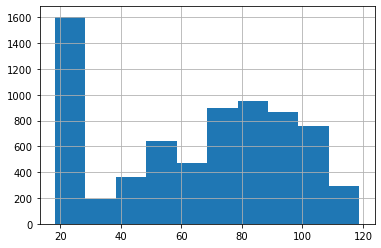

In [6]:
df.monthly_charges.hist()

<AxesSubplot:>

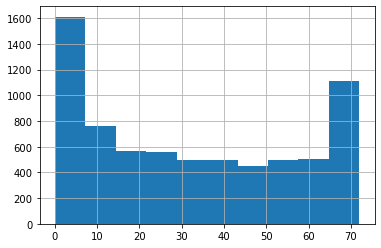

In [7]:
df.tenure.hist()

<p style="font-family:courier; font-size:150%; text-align:left"> <b>Target - "churn"<b> </p>

In [8]:
print(get_target(df).to_markdown())

|             | Target                                             |
|:------------|:---------------------------------------------------|
| Feature     | churn                                              |
| Datatype    | 7043 non-null: object                              |
| Description | Yes or no, whether or not the customer has churned |


In [9]:
print(df.churn.value_counts().to_markdown())

|     |   churn |
|:----|--------:|
| No  |    5174 |
| Yes |    1869 |


<AxesSubplot:>

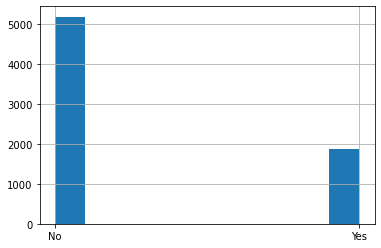

In [10]:
df.churn.hist()

<p style="font-family:courier; font-size:150%; text-align:left"> <b>Data Dictionary<b> </p>

In [11]:
print(get_data_dictionary(df).to_markdown())

| Feature                    | Datatype               | Description                                                           |
|:---------------------------|:-----------------------|:----------------------------------------------------------------------|
| customer_id                | 7043 non-null: object  | Identification number for customer                                    |
| gender                     | 7043 non-null: object  | Customer gender, male or female                                       |
| senior_citizen             | 7043 non-null: int64   | Yes or No, is the customer a senior citizen                           |
| partner                    | 7043 non-null: object  | Yes or No, does the customer customer has a parter                    |
| dependents                 | 7043 non-null: object  | Number of dependents a customer has                                   |
| tenure                     | 7043 non-null: int64   | Number of months a customer has been with the co

<p style="font-family:courier; font-size:150%;">
<b>Data Acquisition Takeaways</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The Telco data has 7043 observations and 27 features.  Monthly charges and Tenure are not normally distributed.  1869 customers have churned.  The feature total charges has a data type of object.<br><br></p>

<p style="font-family:courier; font-size:200%; text-align:center"> <b>Data Preparation<b> </p>

<p style="font-family:courier; font-size:150%;">
<b>Clean</b><br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Missing values, the Telco data had 11 observations missing a value in the feature total_charges.  Since these all of these observations had a tenure of zero, I decided to drop them.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Dropping columns, dropped customer_id because it didn't bring any value. Dropped internet_service_type_id.1,  payment_type_id.1, contract_type_id.1 as they were duplicate features.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Convert data type, 'total_charges' was changed from object to float.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Encode, used pd.get_dummies() to create new encoded features and dropped the non-encoded features</p>

<p style="font-family:courier; font-size:150%;">
<b>Split</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Used sklearn.model_selection to split my cleaned data into three data sets train, validate, and test<br><br></p>

<p style="font-family:courier; font-size:150%;">
<b>Prepare</b><br><br></p>

In [23]:
train, validate, test = prep_telco_data(get_telco_data())

In [24]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3937, 41)
validate -> (1688, 41)
test -> (1407, 41)


<p style="font-family:courier; font-size:150%;">
<b>Data Preperation Takeaways</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;All features and observations have no null or empty values.  All values have been encoded to numberic values.  test_train_split were stratified on my target feature churn. <br><br></p>

<p style="font-family:courier; font-size:200%; text-align:center"> <b>Data Exploration & Analysis<b> </p>

<p style="font-family:courier; font-size:150%;">
<b>Explore</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I will be looking for features that are going to help my model accurately predict churn.  I currently have 41 features and need to find the best ones.  To do this, I asked questions like:<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-Which features are too small of a sample?<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-Which features have more of an association with churn?<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-Are churned customers average total charges is greather than average total charges for not churned customers?<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-Are customers who churn average tenure less than the average tenure of those who do not churn?</p>

<p style="font-family:courier; font-size:150%;">
<b>explore_univariate()</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;What features have a low sample size? When exploring explore_univariate(), I passed in my categorical features, I found that senior_citizen, dependents, and phone_service had a low sample size.  The graph below is an example of what I idenified as low sample size. <br><br></p>

<img src="charts/senior_count_blue.png" align="left" width="250" height="250">

<p style="font-family:courier; font-size:150%;">
<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As you can see from the graph, this was a big indicator that I did not want to use senior citizen or the others that looked like this as features for my models.

<p style="font-family:courier; font-size:150%;">
<b>explore_bivariate()</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I explored into finding what features had a high or low churn rate using explore_bivariate().  I wanted to identify features that had an association with churn. I kept the features that had a much larger or lower churn rate.  I decided to drop any feature who's churn rate was roughly equal.  For example, take a look at the graph below.<br><br></p>

<img src="charts/gender_churn_blue.png" align="left" width="250" height="250">

<p style="font-family:courier; font-size:150%;">
<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Notice, that if you are a male or a female, the rate churn is roughly the same.  I don't believe feature like this would help my model accurately predict churn, so I dropped features that were similar to this gender example.  The features that I decided to keep, look more like the example below. </p>

<img src="charts/fiber_churn_blue.png" align="left" width="250" height="250">

<p style="font-family:courier; font-size:150%;">
<b>Explore Takeaways</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Service features like online_security, device_protection, etc... all had an option for "no internet service" but this was redundant because the feature internet_service_None already took 'no internet' into account.  Also we didn't need a yes and no for services, so the no's were dropped. Streaming_tv and streaming_movies both had high churn rate for yes and for no so they got dropped.  I originally had 41 features and exploration dropped it down to 20.<br><br></p>

<p style="font-family:courier; font-size:150%;">
<b>Analysis</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p>

<p style="font-family:courier; font-size:150%;">
<b>Original Hypothesis</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Churned customers average total charges is greather than average total charges for not churned customers.</p>

<p style="font-family:courier; font-size:150%;">
$H_0$: Churned customers average total charges is less than or equal to average total charges not churned customers.<br><br>$H_a$: Churned customers average total charges is greather than average total charges for not churned customers.<br><br></p>

In [30]:
alpha = .05

In [81]:
# Not using prepare.prep_telco_data() because I dont want the df split for hypothesis testing
df = clean_telco(get_telco_data())

In [82]:
churned = df[df['churn'] == 1].total_charges
not_churned = df[df['churn'] == 0].total_charges

In [83]:
# At a glance we can see that not_churned have higher avg total_charges.
churned.mean(), not_churned.mean()

(1531.7960941680035, 2555.3441410032956)

<AxesSubplot:>

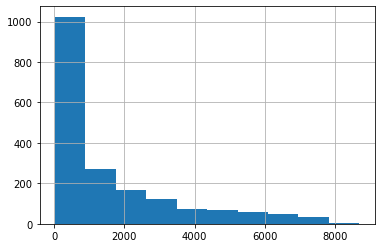

In [42]:
# Checking for normal distributions
churned.hist()

<AxesSubplot:>

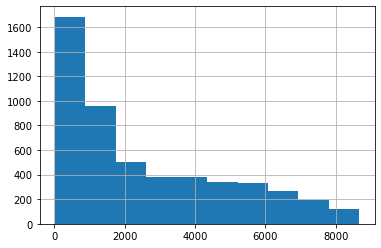

In [43]:
not_churned.hist()

In [84]:
churned.var(), not_churned.var()

(3575211.5963953366, 5426369.838258472)

In [85]:
t, p = stats.levene(churned, not_churned)

p #The small p-value suggests that the populations do not have equal variances.

1.1261484352280497e-37

<p style="font-family:courier; font-size:150%;">
We can not assume normal distribution or equal variance so we have to preform a non-parametric test</p>

In [86]:
u, p = stats.mannwhitneyu(churned, not_churned, alternative='greater')
u, p

(3360665.0, 1.0)

In [88]:
if (p< alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypthesis")

Fail to Reject Null Hypthesis


<p style="font-family:courier; font-size:150%;">
Conclusion: Churned customers average total charges is LESS than or equal to average total charges not churned customers.<br><br>Takeaway: Total Charges will be a useful feature.<br><br></p>

<p style="font-family:courier; font-size:150%;">
<b>Hypothesis 2</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Are customers who churn average tenure less than the average tenure of those who do not churn?</p>

<p style="font-family:courier; font-size:150%;">
$H_0$: Customers who churn average tenure greater than or equal the average tenure of those who do not churn.<br><br>
$H_a$: Customers who churn average tenure less than the average tenure of those who do not churn.<br><br></p>

In [99]:
churned = df[df['churn'] == 1].tenure
not_churned = df[df['churn'] == 0].tenure

In [112]:
# At a glance we can see that not_churned have a higher avg tenure.
churned.mean(), not_churned.mean()

(17.979133226324237, 37.65000968429208)

<AxesSubplot:>

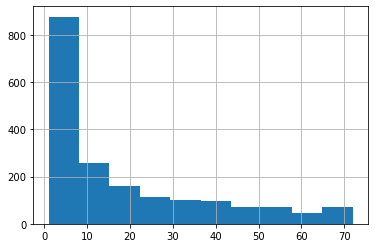

In [102]:
# Checking for normal distributions
churned.hist()

<AxesSubplot:>

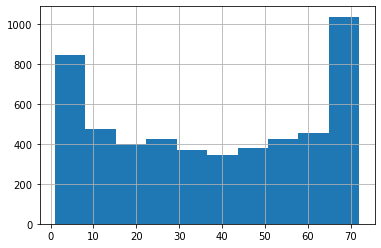

In [103]:
not_churned.hist()

In [104]:
churned.var(), not_churned.var()

(381.46476777078675, 579.6990638317611)

In [105]:
t, p = stats.levene(churned, not_churned)

p #The small p-value suggests that the populations do not have equal variances.

2.715805716226133e-89

<p style="font-family:courier; font-size:150%;">
We can not assume normal distribution or equal variance so we have to preform a non-parametric test</p>

In [109]:
U, p = stats.mannwhitneyu(churned, not_churned, alternative='less')
U, p

(2494979.0, 3.0215232904413584e-211)

In [110]:
if (p< alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypthesis")

Reject Null Hypothesis


<p style="font-family:courier; font-size:150%;">
Conclusion: Customers who churn average tenure IS less than the average tenure of those who do not churn.<br><br>Takeaway: Tenure will be a useful feature.<br><br></p>

<p style="font-family:courier; font-size:150%;">
<b>Analysis Takeaways</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Total charges and tenure seem to have an association with churn.  I will include both in my model.<br><br></p>

<p style="font-family:courier; font-size:200%; text-align:center"> <b>Modeling and Evaluation<b><br><br> </p>

In [122]:
train, validate, test = prep_telco_data(get_telco_data())

<p style="font-family:courier; font-size:150%;">
<b>Setup Basline</b><br></p>

In [125]:
train.churn.value_counts()

0    2891
1    1046
Name: churn, dtype: int64

In [127]:
baseline_accuracy = (train.churn == 0).mean()
print(f"Baseline Accuracy is: {round(baseline_accuracy, 3)*100}%")

Baseline Accuracy is: 73.4%


<p style="font-family:courier; font-size:150%;">
<b>Threshold Allocation</b><br></p>

In [187]:
threshold = .05

<p style="font-family:courier; font-size:150%;">
<b>Models</b><br></p>

<p style="font-family:courier; font-size:150%;">
I'm going to try Logistic_Regression, DecisionTree, RandomForest, and Kneighbors Classifiers with: <br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'tenure'<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'monthly_charges'<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'total_charges'<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'partner_Yes'<br>
       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'paperless_billing_Yes'<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'churn'<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'online_security_Yes'<br>
       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'online_backup_Yes'<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'device_protection_Yes'<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'tech_support_Yes'<br>
       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'payment_Bank transfer'<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'payment_Credit card'<br>
       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'payment_Electronic check'<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'payment_Mailed check'<br>
       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'internet_service_DSL'<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'internet_service_Fiber optic'<br>
       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'internet_service_None'<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'contract_Month-to-month'<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'contract_One year'<br>
       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'contract_Two year'

<p style="font-family:courier; font-size:150%;">
My goal is to beat my 73% baseline accuracy.</p>

<p style="font-family:courier; font-size:150%;">
This will provide a glance at the performance of four different classifiers; I can either test the best performing model or go on and perform feature engineering or adjust hyperparameters.</p>

<p style="font-family:courier; font-size:150%;">
<b>Define X and y, train, validate, and test datasets</b></p>

In [341]:
features =['tenure', 'monthly_charges', 'total_charges', 'partner_Yes',
       'paperless_billing_Yes', 'online_security_Yes',
       'online_backup_Yes', 'device_protection_Yes', 'tech_support_Yes',
       'payment_Bank transfer', 'payment_Credit card',
       'payment_Electronic check', 'payment_Mailed check',
       'internet_service_DSL', 'internet_service_Fiber optic',
       'internet_service_None', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year']

<p style="font-family:courier; font-size:150%;">
<b>X</b><br></p>

In [323]:
X_train = train[features]
X_validate = validate[features]
X_test = test[features]

<p style="font-family:courier; font-size:150%;">
<b>y</b><br></p>

In [324]:
y_train = train['churn']
y_validate = validate['churn']
y_test = test['churn']

<p style="font-family:courier; font-size:150%;">
<b>Decision Tree Classifier</b></p>

In [325]:
# Make the model
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the model
clf = clf.fit(X_train, y_train)

# Train
y_pred = clf.predict(X_train)
train_accuracy = clf.score(X_train, y_train)

# Validate

y_pred = clf.predict(X_validate)
validate_accuracy = clf.score(X_validate, y_validate)


print('Accuracy of Decision Tree classifier on training set: {:.3f}'
      .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on validate set: {:.3f}'
      .format(clf.score(X_validate, y_validate)))
print(f"Passes Treshold Allocation: {threshold > round(abs(train_accuracy-validate_accuracy), 3)}")


Accuracy of Decision Tree classifier on training set: 0.793
Accuracy of Decision Tree classifier on validate set: 0.792
Passes Treshold Allocation: True


<p style="font-family:courier; font-size:150%;">
<b>Random Forest Classifier</b></p>

In [326]:
# Make the model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=123)

# Fit the model
rf.fit(X_train, y_train)

# Train
y_pred = rf.predict(X_train)
train_accuracy = rf.score(X_train, y_train)

# Validate
y_pred = rf.predict(X_validate)
validate_accuracy = rf.score(X_validate, y_validate)

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of random forest classifier on validate set: {:.3f}'
      .format(rf.score(X_validate, y_validate)))
print(f"Passes Treshold Allocation: {threshold > round(abs(train_accuracy-validate_accuracy), 3)}")

Accuracy of random forest classifier on training set: 0.81
Accuracy of random forest classifier on validate set: 0.800
Passes Treshold Allocation: True


<p style="font-family:courier; font-size:150%;">
<b>K Neighbors Classifier</b></p>

In [327]:
# Make the model
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

# Fit the model
knn.fit(X_train, y_train)

# Train
y_pred = knn.predict(X_train)
train_accuracy = knn.score(X_train, y_train)

# Validate
y_pred = knn.predict(X_validate)
validate_accuracy = knn.score(X_validate, y_validate)

print('Accuracy of K Neighbors classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K Neighbors classifier on validate set: {:.3f}'
      .format(knn.score(X_validate, y_validate)))
print(f"Passes Treshold Allocation: {threshold > round(abs(train_accuracy-validate_accuracy), 3)}")

Accuracy of K Neighbors classifier on training set: 0.80
Accuracy of K Neighbors classifier on validate set: 0.775
Passes Treshold Allocation: True


<p style="font-family:courier; font-size:150%;">
<b>Logistic Regression Classifier</b></p>

In [328]:
# Make the model
logit = LogisticRegression(C=.1, random_state=123)

# Fit the Model
logit.fit(X_train, y_train)

# Train
y_pred = logit.predict(X_train)
train_accuracy = logit.score(X_train, y_train)

# Validate
y_pred = logit.predict(X_validate)
validate_accuracy = logit.score(X_validate, y_validate)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on validate set: {:.3f}'
      .format(logit.score(X_validate, y_validate)))
print(f"Passes Treshold Allocation: {threshold > round(abs(train_accuracy-validate_accuracy), 3)}")

Accuracy of Logistic Regression classifier on training set: 0.80
Accuracy of Logistic Regression classifier on validate set: 0.791
Passes Treshold Allocation: True


<p style="font-family:courier; font-size:150%;">
<b>MVP Models - Takeaways</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;All of the models, train and validate, accuracy were in the high 70's. <br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;These models all predicted my target variable, churn, much better than my baseline accuracy of 73% on both train and validate datasets.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;All of the models passed the threshold allocation<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I am going to move foward with my random forest classifier because it scored the highest on validate. It also has reduction in over-fitting and naturally performs feature selection.</p>

<p style="font-family:courier; font-size:150%;">
<b>Test My Best Model</b></p>

In [329]:
# Make the model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=123)

# Fit the model
rf.fit(X_train, y_train)

# Train
y_pred = rf.predict(X_train)
train_accuracy = rf.score(X_train, y_train)

# Validate
y_pred = rf.predict(X_validate)
validate_accuracy = rf.score(X_validate, y_validate)

# Test
y_pred = rf.predict(X_test)
test_accuracy = rf.score(X_test, y_test)

print('Accuracy of Random Forest classifier on training set: {:.3f}'
      .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on validate set: {:.3f}'
      .format(rf.score(X_validate, y_validate)))
print('Accuracy of Random Forest classifier on test set: {:.3f}'
      .format(rf.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.813
Accuracy of Random Forest classifier on validate set: 0.800
Accuracy of Random Forest classifier on test set: 0.801


<p style="font-family:courier; font-size:150%;">
<b>Feature Importance</b></p>

In [373]:
rf.feature_importances_

array([0.1665408 , 0.09935391, 0.11849976, 0.00493866, 0.01751831,
       0.03544801, 0.00835064, 0.0058714 , 0.01722538, 0.00280043,
       0.00447194, 0.06001308, 0.00709568, 0.02274862, 0.11585295,
       0.04549472, 0.18088997, 0.02541342, 0.06147233])

<p style="font-family:courier; font-size:150%;">Random Forest classifier idenified the most important features as contract_Month-to-month, tenure, total_charges, and fiber in that order.</p>

<p style="font-family:courier; font-size:200%; text-align:center"> <b>Create the Predictions CSV<b><br><br> </p>

In [365]:
proba_test = rf.predict_proba(X_test)

In [366]:
proba_df = pd.DataFrame(proba_test, columns=rf.classes_.tolist())

In [367]:
reset_test = test.reset_index()

In [368]:
test_proba_df = pd.concat([reset_test, proba_df], axis=1)

In [369]:
test_proba_df = test_proba_df.rename(columns={0: 'not_churn', 1:'churn_yes'})

In [370]:
test_proba_df['predicted'] = np.where(test_proba_df.not_churn > test_proba_df.churn_yes, 'not_churn', 'churn')

In [371]:
csv_df = test_proba_df[['index', 'churn', 'not_churn', 'churn_yes', 'predicted']]
csv_df.head()

,index,churn,not_churn,churn_yes,predicted
0,2897,0,0.735046,0.264954,not_churn
1,6407,0,0.913181,0.086819,not_churn
2,6272,0,0.958836,0.041164,not_churn
3,5638,0,0.992118,0.007882,not_churn
4,903,0,0.941565,0.058435,not_churn


In [ ]:
# Write DataFrame to a csv file for deliverable.

csv_df.to_csv('predictions.csv')

<p style="font-family:courier; font-size:150%;"><b>Conclusion</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;My random forest classifier model accuracy was 80%, beating my baseline accuracy of 73%.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;My model identified the most important features as Month-to-month, tenure, total_charges, and fiber in that order.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;If I had more time, I would have liked to try a lot more combinations of features.  I would have also liked to iterate through hyperparameters to boost accuracy.<br><br><b>Recommendations</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The data suggests signing up new customers and current customers into a longer contract other than month-to-month and not suggesting fiber as an internet speed would lower the churn rate.</p></p>

<p style="font-family:courier; font-size:200%; text-align:center"> <b>Thank You<b><br><br> </p>